# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

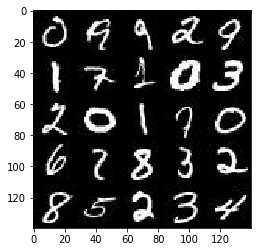

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

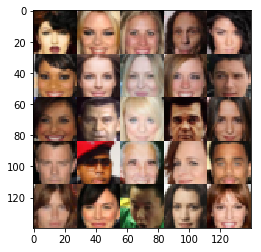

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    
    # TODO: Implement Function
    
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels) , name='input_real' )
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32)
    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [23]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    with tf.variable_scope('discriminator', reuse=reuse):
    # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * x1, x1)

        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)

        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)

        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits

    

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [24]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    reuse = True
    alpha = 0.1
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)  #512
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, 2, 2, 512))  #512
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        # 4x4x512 now
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')  #256
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        
        # 7x7x256 now
        
# x2:  Tensor("generator/Maximum_1:0", shape=(?, 14, 14, 256), dtype=float32)
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        print("x3: ", x3)      
        # 14x14x128 now
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        
#         # 28x28x3 now
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

x3:  Tensor("Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)
x3:  Tensor("Maximum_5:0", shape=(?, 14, 14, 128), dtype=float32)
Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True) 
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

x3:  Tensor("generator/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)
Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
#     d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
#     g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    # Get the trainable_variables, split into G and D parts
    
    all_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)

    g_update_ops = [var for var in all_update_ops if var.name.startswith('generator')]
    d_update_ops = [var for var in all_update_ops if var.name.startswith('discriminator')]

    with tf.control_dependencies(d_update_ops):
        d_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(g_update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
%%time

def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    print("data shape1: ",data_shape[1])
    print("data shape2: ",data_shape[2])
    print("data shape3: ",data_shape[3])
    print("z dim: ",z_dim)    

#     tf.reset_default_graph()

    input_real, input_z, l_rate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)

    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3])

    d_opt, g_opt = model_opt(d_loss, g_loss, l_rate, beta1)    
    
    losses = []
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                # rescale the true images, between -1 to 1 too.
                batch_images = batch_images*2

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, l_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, l_rate: learning_rate})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 2, input_z, data_shape[3], data_image_mode)

    
    return losses                
                
                

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 9.06 µs


### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

data shape1:  28
data shape2:  28
data shape3:  1
z dim:  100
x3:  Tensor("generator/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)
Epoch 1/2... Discriminator Loss: 4.2665... Generator Loss: 0.0161
Epoch 1/2... Discriminator Loss: 4.4335... Generator Loss: 0.0149
Epoch 1/2... Discriminator Loss: 2.6985... Generator Loss: 0.0955
Epoch 1/2... Discriminator Loss: 1.9773... Generator Loss: 0.1959
Epoch 1/2... Discriminator Loss: 1.4962... Generator Loss: 0.3198
Epoch 1/2... Discriminator Loss: 0.4737... Generator Loss: 1.5842
Epoch 1/2... Discriminator Loss: 1.4626... Generator Loss: 7.9251
Epoch 1/2... Discriminator Loss: 0.8735... Generator Loss: 4.2720
Epoch 1/2... Discriminator Loss: 0.6770... Generator Loss: 2.0952
Epoch 1/2... Discriminator Loss: 0.7076... Generator Loss: 0.9418
x3:  Tensor("generator_1/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


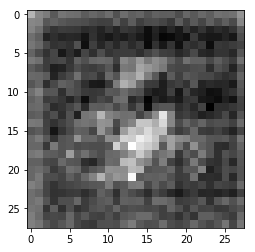

Epoch 1/2... Discriminator Loss: 0.6992... Generator Loss: 1.1427
Epoch 1/2... Discriminator Loss: 1.2596... Generator Loss: 0.5565
Epoch 1/2... Discriminator Loss: 0.8877... Generator Loss: 0.8834
Epoch 1/2... Discriminator Loss: 1.0821... Generator Loss: 0.6891
Epoch 1/2... Discriminator Loss: 0.9473... Generator Loss: 0.8552
Epoch 1/2... Discriminator Loss: 0.7448... Generator Loss: 0.9888
Epoch 1/2... Discriminator Loss: 1.3135... Generator Loss: 0.4455
Epoch 1/2... Discriminator Loss: 1.0163... Generator Loss: 0.6459
Epoch 1/2... Discriminator Loss: 1.4272... Generator Loss: 0.3825
Epoch 1/2... Discriminator Loss: 1.1291... Generator Loss: 0.6023
x3:  Tensor("generator_2/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


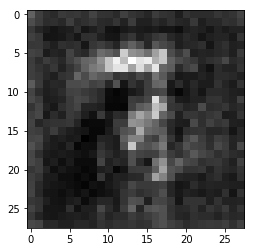

Epoch 1/2... Discriminator Loss: 1.0383... Generator Loss: 0.7042
Epoch 1/2... Discriminator Loss: 1.2201... Generator Loss: 0.6218
Epoch 1/2... Discriminator Loss: 1.0918... Generator Loss: 0.6013
Epoch 1/2... Discriminator Loss: 1.2937... Generator Loss: 0.4600
Epoch 1/2... Discriminator Loss: 1.0879... Generator Loss: 0.5777
Epoch 1/2... Discriminator Loss: 0.9128... Generator Loss: 0.7654
Epoch 1/2... Discriminator Loss: 1.2721... Generator Loss: 0.4539
Epoch 1/2... Discriminator Loss: 1.1125... Generator Loss: 0.5419
Epoch 1/2... Discriminator Loss: 0.9284... Generator Loss: 0.7446
Epoch 1/2... Discriminator Loss: 1.0712... Generator Loss: 0.6005
x3:  Tensor("generator_3/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


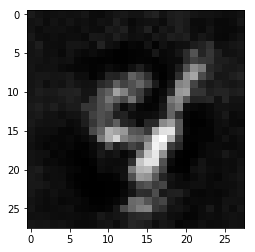

Epoch 1/2... Discriminator Loss: 1.0365... Generator Loss: 0.6316
Epoch 1/2... Discriminator Loss: 1.3237... Generator Loss: 0.4497
Epoch 1/2... Discriminator Loss: 1.2528... Generator Loss: 0.4539
Epoch 1/2... Discriminator Loss: 1.2483... Generator Loss: 0.4610
Epoch 1/2... Discriminator Loss: 1.0579... Generator Loss: 0.5956
Epoch 1/2... Discriminator Loss: 1.2064... Generator Loss: 0.4818
Epoch 1/2... Discriminator Loss: 1.0052... Generator Loss: 0.6490
Epoch 1/2... Discriminator Loss: 1.2178... Generator Loss: 0.4644
Epoch 1/2... Discriminator Loss: 1.0901... Generator Loss: 0.5698
Epoch 1/2... Discriminator Loss: 1.1349... Generator Loss: 0.5286
x3:  Tensor("generator_4/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


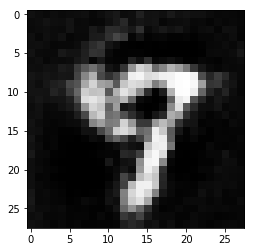

Epoch 1/2... Discriminator Loss: 1.1749... Generator Loss: 0.4939
Epoch 1/2... Discriminator Loss: 1.2351... Generator Loss: 0.4594
Epoch 1/2... Discriminator Loss: 1.0790... Generator Loss: 0.5496
Epoch 1/2... Discriminator Loss: 1.0756... Generator Loss: 0.5816
Epoch 1/2... Discriminator Loss: 1.0783... Generator Loss: 0.6023
Epoch 1/2... Discriminator Loss: 1.1297... Generator Loss: 0.5289
Epoch 2/2... Discriminator Loss: 1.1728... Generator Loss: 0.4779
Epoch 2/2... Discriminator Loss: 1.1123... Generator Loss: 0.5325
Epoch 2/2... Discriminator Loss: 1.0827... Generator Loss: 0.5496
Epoch 2/2... Discriminator Loss: 1.1575... Generator Loss: 0.4921
x3:  Tensor("generator_5/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


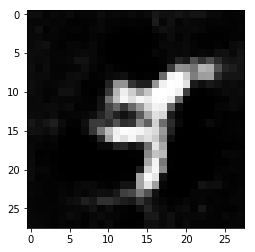

Epoch 2/2... Discriminator Loss: 1.1060... Generator Loss: 0.5382
Epoch 2/2... Discriminator Loss: 0.9910... Generator Loss: 0.6152
Epoch 2/2... Discriminator Loss: 1.2535... Generator Loss: 0.4337
Epoch 2/2... Discriminator Loss: 1.2368... Generator Loss: 0.4454
Epoch 2/2... Discriminator Loss: 1.1695... Generator Loss: 0.5230
Epoch 2/2... Discriminator Loss: 1.2222... Generator Loss: 0.4561
Epoch 2/2... Discriminator Loss: 1.1132... Generator Loss: 0.5285
Epoch 2/2... Discriminator Loss: 1.0517... Generator Loss: 0.5911
Epoch 2/2... Discriminator Loss: 1.1417... Generator Loss: 0.5094
Epoch 2/2... Discriminator Loss: 1.1670... Generator Loss: 0.5302
x3:  Tensor("generator_6/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


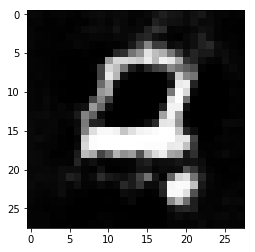

Epoch 2/2... Discriminator Loss: 1.1962... Generator Loss: 0.4985
Epoch 2/2... Discriminator Loss: 1.1257... Generator Loss: 0.5647
Epoch 2/2... Discriminator Loss: 1.2069... Generator Loss: 0.4890
Epoch 2/2... Discriminator Loss: 1.1016... Generator Loss: 0.5702
Epoch 2/2... Discriminator Loss: 1.1954... Generator Loss: 0.4960
Epoch 2/2... Discriminator Loss: 1.3241... Generator Loss: 0.4110
Epoch 2/2... Discriminator Loss: 1.1396... Generator Loss: 0.5311
Epoch 2/2... Discriminator Loss: 1.1489... Generator Loss: 0.5298
Epoch 2/2... Discriminator Loss: 1.1466... Generator Loss: 0.5303
Epoch 2/2... Discriminator Loss: 1.1272... Generator Loss: 0.5119
x3:  Tensor("generator_7/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


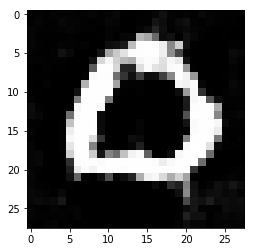

Epoch 2/2... Discriminator Loss: 1.1139... Generator Loss: 0.5727
Epoch 2/2... Discriminator Loss: 1.1365... Generator Loss: 0.5204
Epoch 2/2... Discriminator Loss: 1.1380... Generator Loss: 0.5106
Epoch 2/2... Discriminator Loss: 1.1070... Generator Loss: 0.5864
Epoch 2/2... Discriminator Loss: 1.2806... Generator Loss: 0.4259
Epoch 2/2... Discriminator Loss: 1.1647... Generator Loss: 0.4904
Epoch 2/2... Discriminator Loss: 1.0610... Generator Loss: 0.5827
Epoch 2/2... Discriminator Loss: 1.0612... Generator Loss: 0.5988
Epoch 2/2... Discriminator Loss: 1.1225... Generator Loss: 0.5212
Epoch 2/2... Discriminator Loss: 1.2620... Generator Loss: 0.4265
x3:  Tensor("generator_8/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


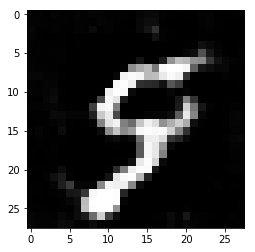

Epoch 2/2... Discriminator Loss: 1.1968... Generator Loss: 0.4776
Epoch 2/2... Discriminator Loss: 1.0956... Generator Loss: 0.5559
Epoch 2/2... Discriminator Loss: 1.1782... Generator Loss: 0.5145
Epoch 2/2... Discriminator Loss: 1.0347... Generator Loss: 0.6388
Epoch 2/2... Discriminator Loss: 1.3779... Generator Loss: 0.3923
Epoch 2/2... Discriminator Loss: 0.9974... Generator Loss: 0.6536
Epoch 2/2... Discriminator Loss: 1.1208... Generator Loss: 0.5233
Epoch 2/2... Discriminator Loss: 1.2496... Generator Loss: 0.4403
Epoch 2/2... Discriminator Loss: 1.0845... Generator Loss: 0.5778
Epoch 2/2... Discriminator Loss: 1.3193... Generator Loss: 0.4161
x3:  Tensor("generator_9/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


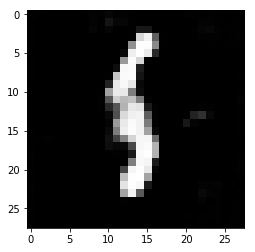

Epoch 2/2... Discriminator Loss: 0.9243... Generator Loss: 0.8360
Epoch 2/2... Discriminator Loss: 0.9192... Generator Loss: 0.8481
Epoch 2/2... Discriminator Loss: 0.9721... Generator Loss: 0.7019
CPU times: user 3min 5s, sys: 53.9 s, total: 3min 59s
Wall time: 6min 1s


In [25]:
%%time

batch_size = 128 #None
z_dim = 100 #None
learning_rate = 0.0002 #None
beta1 = 0.1 #None


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

data shape1:  28
data shape2:  28
data shape3:  3
z dim:  100
x3:  Tensor("generator/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)
Epoch 1/1... Discriminator Loss: 1.1084... Generator Loss: 3.5498
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 5.5111
Epoch 1/1... Discriminator Loss: 1.1647... Generator Loss: 4.8125
Epoch 1/1... Discriminator Loss: 1.0308... Generator Loss: 4.9535
Epoch 1/1... Discriminator Loss: 2.3325... Generator Loss: 0.1525
Epoch 1/1... Discriminator Loss: 0.4612... Generator Loss: 1.8696
Epoch 1/1... Discriminator Loss: 0.4563... Generator Loss: 3.7270
Epoch 1/1... Discriminator Loss: 0.9670... Generator Loss: 0.8364
Epoch 1/1... Discriminator Loss: 1.5609... Generator Loss: 0.3762
Epoch 1/1... Discriminator Loss: 1.1945... Generator Loss: 0.7286
x3:  Tensor("generator_1/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


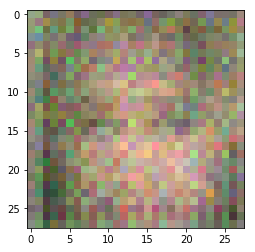

Epoch 1/1... Discriminator Loss: 1.4346... Generator Loss: 0.5189
Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.5080
Epoch 1/1... Discriminator Loss: 1.3906... Generator Loss: 0.4058
Epoch 1/1... Discriminator Loss: 1.0208... Generator Loss: 0.9511
Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 0.9465
Epoch 1/1... Discriminator Loss: 1.2929... Generator Loss: 0.5912
Epoch 1/1... Discriminator Loss: 1.2598... Generator Loss: 0.6583
Epoch 1/1... Discriminator Loss: 1.1347... Generator Loss: 0.6965
Epoch 1/1... Discriminator Loss: 1.4654... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 1.3883... Generator Loss: 1.6718
x3:  Tensor("generator_2/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


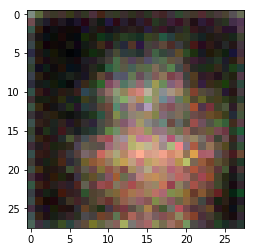

Epoch 1/1... Discriminator Loss: 1.1797... Generator Loss: 1.1336
Epoch 1/1... Discriminator Loss: 1.5178... Generator Loss: 0.3666
Epoch 1/1... Discriminator Loss: 1.2848... Generator Loss: 0.5411
Epoch 1/1... Discriminator Loss: 1.4404... Generator Loss: 0.5094
Epoch 1/1... Discriminator Loss: 1.6279... Generator Loss: 0.3365
Epoch 1/1... Discriminator Loss: 1.1331... Generator Loss: 0.6483
Epoch 1/1... Discriminator Loss: 1.5350... Generator Loss: 0.3455
Epoch 1/1... Discriminator Loss: 1.1569... Generator Loss: 0.7026
Epoch 1/1... Discriminator Loss: 1.4422... Generator Loss: 0.3905
Epoch 1/1... Discriminator Loss: 1.2990... Generator Loss: 0.5151
x3:  Tensor("generator_3/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


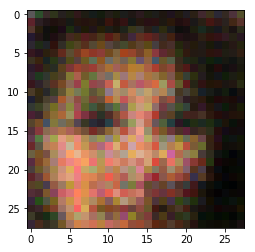

Epoch 1/1... Discriminator Loss: 1.5734... Generator Loss: 0.3147
Epoch 1/1... Discriminator Loss: 1.6155... Generator Loss: 0.3435
Epoch 1/1... Discriminator Loss: 1.3461... Generator Loss: 0.5414
Epoch 1/1... Discriminator Loss: 1.4044... Generator Loss: 0.4595
Epoch 1/1... Discriminator Loss: 1.4279... Generator Loss: 0.4564
Epoch 1/1... Discriminator Loss: 1.2031... Generator Loss: 0.6171
Epoch 1/1... Discriminator Loss: 1.2286... Generator Loss: 0.5651
Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 0.5411
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.4831
Epoch 1/1... Discriminator Loss: 1.2639... Generator Loss: 0.6288
x3:  Tensor("generator_4/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


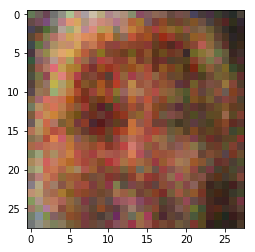

Epoch 1/1... Discriminator Loss: 1.4229... Generator Loss: 0.3853
Epoch 1/1... Discriminator Loss: 1.2665... Generator Loss: 0.5654
Epoch 1/1... Discriminator Loss: 1.6444... Generator Loss: 0.3146
Epoch 1/1... Discriminator Loss: 1.1967... Generator Loss: 0.6036
Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 0.6334
Epoch 1/1... Discriminator Loss: 1.5530... Generator Loss: 0.3939
Epoch 1/1... Discriminator Loss: 1.1067... Generator Loss: 0.8027
Epoch 1/1... Discriminator Loss: 1.6560... Generator Loss: 0.3069
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 0.4805
Epoch 1/1... Discriminator Loss: 1.2165... Generator Loss: 0.6238
x3:  Tensor("generator_5/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


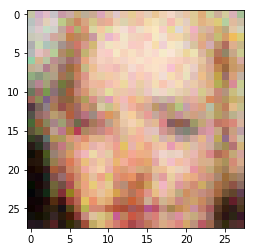

Epoch 1/1... Discriminator Loss: 1.4119... Generator Loss: 0.4320
Epoch 1/1... Discriminator Loss: 1.3011... Generator Loss: 0.4747
Epoch 1/1... Discriminator Loss: 1.3037... Generator Loss: 0.4699
Epoch 1/1... Discriminator Loss: 1.6464... Generator Loss: 0.3219
Epoch 1/1... Discriminator Loss: 1.1614... Generator Loss: 0.6036
Epoch 1/1... Discriminator Loss: 1.4429... Generator Loss: 0.3892
Epoch 1/1... Discriminator Loss: 1.5484... Generator Loss: 0.3463
Epoch 1/1... Discriminator Loss: 1.0648... Generator Loss: 0.8113
Epoch 1/1... Discriminator Loss: 1.2715... Generator Loss: 0.5046
Epoch 1/1... Discriminator Loss: 1.5109... Generator Loss: 0.3599
x3:  Tensor("generator_6/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


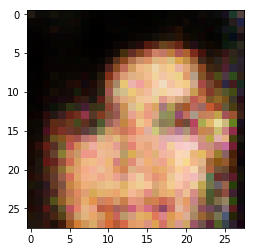

Epoch 1/1... Discriminator Loss: 1.3525... Generator Loss: 0.4799
Epoch 1/1... Discriminator Loss: 1.8616... Generator Loss: 0.2246
Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 0.3926
Epoch 1/1... Discriminator Loss: 1.2295... Generator Loss: 0.4635
Epoch 1/1... Discriminator Loss: 1.4163... Generator Loss: 0.3644
Epoch 1/1... Discriminator Loss: 1.3595... Generator Loss: 0.4421
Epoch 1/1... Discriminator Loss: 1.6678... Generator Loss: 0.2745
Epoch 1/1... Discriminator Loss: 1.2330... Generator Loss: 0.4998
Epoch 1/1... Discriminator Loss: 1.2043... Generator Loss: 0.5075
Epoch 1/1... Discriminator Loss: 1.7956... Generator Loss: 0.2365
x3:  Tensor("generator_7/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


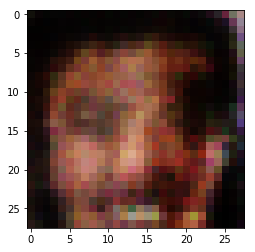

Epoch 1/1... Discriminator Loss: 1.1838... Generator Loss: 0.5386
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.4161
Epoch 1/1... Discriminator Loss: 1.3406... Generator Loss: 0.4044
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.4564
Epoch 1/1... Discriminator Loss: 1.3444... Generator Loss: 0.4317
Epoch 1/1... Discriminator Loss: 1.1956... Generator Loss: 0.5097
Epoch 1/1... Discriminator Loss: 1.2257... Generator Loss: 0.4968
Epoch 1/1... Discriminator Loss: 1.3954... Generator Loss: 0.4002
Epoch 1/1... Discriminator Loss: 1.2010... Generator Loss: 0.4976
Epoch 1/1... Discriminator Loss: 1.5282... Generator Loss: 0.3277
x3:  Tensor("generator_8/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


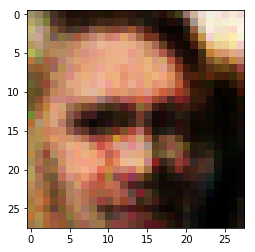

Epoch 1/1... Discriminator Loss: 1.2749... Generator Loss: 0.4319
Epoch 1/1... Discriminator Loss: 1.4569... Generator Loss: 0.3562
Epoch 1/1... Discriminator Loss: 1.2753... Generator Loss: 0.4381
Epoch 1/1... Discriminator Loss: 1.2010... Generator Loss: 2.0594
Epoch 1/1... Discriminator Loss: 0.7261... Generator Loss: 2.5038
Epoch 1/1... Discriminator Loss: 1.1915... Generator Loss: 1.7832
Epoch 1/1... Discriminator Loss: 0.8757... Generator Loss: 1.5725
Epoch 1/1... Discriminator Loss: 1.0883... Generator Loss: 1.6236
Epoch 1/1... Discriminator Loss: 1.2710... Generator Loss: 2.3979
Epoch 1/1... Discriminator Loss: 1.1168... Generator Loss: 1.7840
x3:  Tensor("generator_9/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


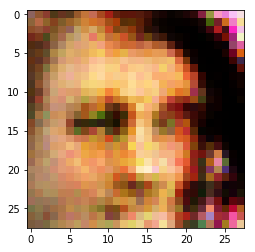

Epoch 1/1... Discriminator Loss: 0.9908... Generator Loss: 2.1081
Epoch 1/1... Discriminator Loss: 1.3120... Generator Loss: 1.3641
Epoch 1/1... Discriminator Loss: 1.0146... Generator Loss: 2.1412
Epoch 1/1... Discriminator Loss: 0.9607... Generator Loss: 1.7961
Epoch 1/1... Discriminator Loss: 0.5668... Generator Loss: 2.6865
Epoch 1/1... Discriminator Loss: 1.0304... Generator Loss: 2.1694
Epoch 1/1... Discriminator Loss: 1.3314... Generator Loss: 0.3867
Epoch 1/1... Discriminator Loss: 1.2239... Generator Loss: 0.6624
Epoch 1/1... Discriminator Loss: 0.8082... Generator Loss: 1.8713
Epoch 1/1... Discriminator Loss: 1.1485... Generator Loss: 2.0434
x3:  Tensor("generator_10/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


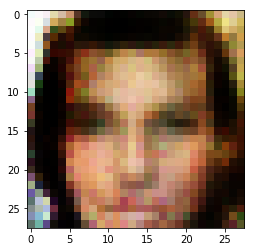

Epoch 1/1... Discriminator Loss: 1.1816... Generator Loss: 1.0294
Epoch 1/1... Discriminator Loss: 1.5364... Generator Loss: 0.3173
Epoch 1/1... Discriminator Loss: 1.8438... Generator Loss: 0.2122
Epoch 1/1... Discriminator Loss: 1.3264... Generator Loss: 1.8425
Epoch 1/1... Discriminator Loss: 0.6316... Generator Loss: 2.3730
Epoch 1/1... Discriminator Loss: 0.9057... Generator Loss: 2.5858
Epoch 1/1... Discriminator Loss: 1.1497... Generator Loss: 1.5772
Epoch 1/1... Discriminator Loss: 1.1138... Generator Loss: 1.5270
Epoch 1/1... Discriminator Loss: 1.5462... Generator Loss: 1.4649
Epoch 1/1... Discriminator Loss: 1.2331... Generator Loss: 2.1436
x3:  Tensor("generator_11/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


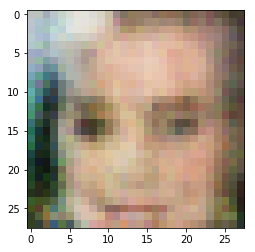

Epoch 1/1... Discriminator Loss: 1.2508... Generator Loss: 0.4461
Epoch 1/1... Discriminator Loss: 1.1891... Generator Loss: 0.5325
Epoch 1/1... Discriminator Loss: 1.2722... Generator Loss: 0.4989
Epoch 1/1... Discriminator Loss: 1.4958... Generator Loss: 0.3308
Epoch 1/1... Discriminator Loss: 1.4038... Generator Loss: 0.3602
Epoch 1/1... Discriminator Loss: 0.9076... Generator Loss: 0.7997
Epoch 1/1... Discriminator Loss: 1.2251... Generator Loss: 0.4338
Epoch 1/1... Discriminator Loss: 0.7512... Generator Loss: 0.9962
Epoch 1/1... Discriminator Loss: 0.9731... Generator Loss: 1.6113
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 1.1115
x3:  Tensor("generator_12/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


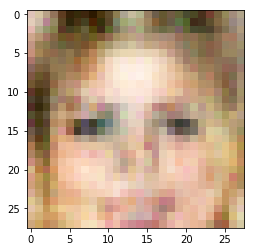

Epoch 1/1... Discriminator Loss: 0.6680... Generator Loss: 1.2473
Epoch 1/1... Discriminator Loss: 0.4568... Generator Loss: 1.9187
Epoch 1/1... Discriminator Loss: 1.5562... Generator Loss: 0.3342
Epoch 1/1... Discriminator Loss: 1.5560... Generator Loss: 1.4560
Epoch 1/1... Discriminator Loss: 1.6951... Generator Loss: 2.1014
Epoch 1/1... Discriminator Loss: 0.8698... Generator Loss: 1.8407
Epoch 1/1... Discriminator Loss: 1.1413... Generator Loss: 1.3301
Epoch 1/1... Discriminator Loss: 1.0497... Generator Loss: 2.0777
Epoch 1/1... Discriminator Loss: 1.0954... Generator Loss: 1.1249
Epoch 1/1... Discriminator Loss: 1.0683... Generator Loss: 1.4617
x3:  Tensor("generator_13/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


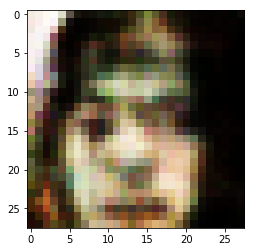

Epoch 1/1... Discriminator Loss: 1.2538... Generator Loss: 0.9564
Epoch 1/1... Discriminator Loss: 0.7538... Generator Loss: 1.3595
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 1.6132
Epoch 1/1... Discriminator Loss: 1.3983... Generator Loss: 1.6531
Epoch 1/1... Discriminator Loss: 0.9823... Generator Loss: 1.4765
Epoch 1/1... Discriminator Loss: 0.8523... Generator Loss: 1.6760
Epoch 1/1... Discriminator Loss: 1.1359... Generator Loss: 1.4505
Epoch 1/1... Discriminator Loss: 0.8004... Generator Loss: 2.5017
Epoch 1/1... Discriminator Loss: 0.9900... Generator Loss: 1.0229
Epoch 1/1... Discriminator Loss: 1.1572... Generator Loss: 0.5389
x3:  Tensor("generator_14/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


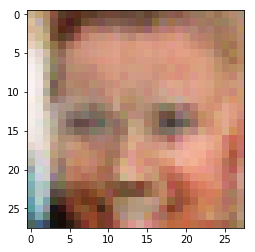

Epoch 1/1... Discriminator Loss: 1.1798... Generator Loss: 0.5034
Epoch 1/1... Discriminator Loss: 1.1374... Generator Loss: 0.5637
Epoch 1/1... Discriminator Loss: 1.5392... Generator Loss: 0.3187
Epoch 1/1... Discriminator Loss: 0.8740... Generator Loss: 0.8046
Epoch 1/1... Discriminator Loss: 1.1624... Generator Loss: 0.4872
Epoch 1/1... Discriminator Loss: 0.8727... Generator Loss: 0.7476
Epoch 1/1... Discriminator Loss: 0.7861... Generator Loss: 0.9918
Epoch 1/1... Discriminator Loss: 1.3990... Generator Loss: 0.4115
Epoch 1/1... Discriminator Loss: 1.1196... Generator Loss: 0.5509
Epoch 1/1... Discriminator Loss: 1.0516... Generator Loss: 0.6567
x3:  Tensor("generator_15/Maximum_2:0", shape=(?, 14, 14, 128), dtype=float32)


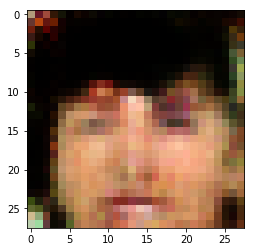

Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.4462
Epoch 1/1... Discriminator Loss: 1.1736... Generator Loss: 0.6413
Epoch 1/1... Discriminator Loss: 0.6913... Generator Loss: 1.1902
Epoch 1/1... Discriminator Loss: 1.1556... Generator Loss: 0.5910
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.3934
Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 0.5801
Epoch 1/1... Discriminator Loss: 1.0613... Generator Loss: 1.4441
Epoch 1/1... Discriminator Loss: 1.4870... Generator Loss: 1.6486


In [26]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.1


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.